# Food Recall FDA Data Analysis Project
#### This project analyzes food recall data collected from the openFDA API.  
The main objectives are:

- Understand the trend of food recalls over time.
- Predict the number of food recalls using machine learning.
- Analyze the distribution of recall severity classifications.


In [ ]:
# Import libraries needed for API request and data
import requests
import pandas as pd
import numpy as np

We used the openFDA API to collect food recall data. Using Python and the requests library, we sent a GET request to the API endpoint to retrieve up to 1000 records in JSON format. The response was then converted into a Python dictionary. After fetching the data, we loaded it into a pandas DataFrame to make it easier to handle and analyze.


In [ ]:
# Set up the URL to call the openFDA API
url = 'https://api.fda.gov/food/enforcement.json?limit=1000'
# Send a GET request to the API
response = requests.get(url)
response.raise_for_status()
data = response.json()
# we used Python and the `requests` library to automatically fetch the data in JSON format. So we didn't need to manually crawl web pages or use Selenium, because the API gave us direct access to the information we needed. After fetching the data, we processed it to prepare for the analysis part.

In [ ]:
# Convert JSON to pandas DataFrame (basic style)
results = data['results']  # Get the 'results' part from JSON
recall_data = pd.DataFrame(results)  # Create DataFrame

# Show DataFrame
recall_data

,status,city,state,country,classification,openfda,product_type,event_id,recalling_firm,address_1,...,recall_number,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,termination_date,report_date,code_info,more_code_info
0,Terminated,Davie,FL,United States,Class II,{},Food,75272,Pharmatech LLC,4131 SW 47th Ave Ste 1403,...,F-0276-2017,"CytoDetox, Hydrolyzed Clinoptilolite Fragments...","1,990 bottles",Recall initiated as a precautionary measure du...,20160808,20161025,20240923,20161102,"UPC No. 632687615989; Lot No. 30661601, Exp. D...",
1,Terminated,Millbrae,CA,United States,Class II,{},Food,75069,Magic Gourmet Trading Inc,375 Adrian Rd,...,F-0865-2017,Koi Palace Mini Moon Cake: Single Box - Mini O...,"2 cases (1 pc/bx, 48bx/cs)","Mooncake products, manufactured and distribute...",20160831,20170106,20170111,20170118,"FG-M1MOT-UW Best by Nov 1, 2016.",
2,Terminated,Miami,FL,United States,Class I,{},Food,69516,"Oasis Brands, Inc",13439 NW 19 LANE,...,F-0609-2015,Crema GuateLinda (Guatemalan Style Cream) in i...,144 pieces,Virginia State (VDACS) found Listeria monocyto...,20141010,20141202,20170328,20141210,UPC 635349 000390 Best By dates: 07/01/14 thr...,NaN
3,Terminated,Pompano Beach,FL,United States,Class I,{},Food,62750,FreshPoint South Florida,2300 NW 19th St,...,F-1922-2012,"Yellow Onion. Product is labeled in part: ""*...",7 cases,FreshPoint South Florida is recalling sliced f...,20120727,20120808,20141008,20120815,Item # 302940.,
4,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Terminated,Denver,CO,United States,Class I,{},Food,67469,All American Seasonings,10600 E 54th Ave,...,F-1676-2014,"Item number T3695, White cheddar jalapeno seas...",550 pounds,All American Seasonings is recalling T3695 Whi...,20140210,20140320,20140415,20140326,Lots 34577 and 40257,
996,Terminated,Rochester,NY,United States,Class II,{},Food,78388,"Wegmans Food Markets, Inc.",1500 Brooks Ave,...,F-0104-2018,"Wegmans Large Cheese Filled Cannoli, 2 Pack, 5...",Unknown,Products contain undeclared soy lecithin,20171026,20171102,20171102,20171108,"Sold prior to October 26, 2017",NaN
997,Terminated,Dover,FL,United States,Class II,{},Food,86490,TAMPA BAY FISHERIES INC,North Gallagher Rd,...,F-0028-2021,Meal Simple Taco Seasoned Salmon Over Fire Roa...,75 cases / 405 lb,Undeclared soy (whole edamame beans),20200923,20201016,20210223,20201014,Lot# 02591715,NaN
998,Terminated,Beloit,WI,United States,Class II,{},Food,61890,Kerry Ingredients & Flavours Research & Develo...,3400 Millington Rd,...,F-1409-2012,"Bourbon Seasoning 30458458, item number 304584...",40 bags (2000 pounds),Ingredients used to manufacture seasonings wer...,20120517,20120613,20121115,20120620,Lot code 0423260110,


## Clean and Prepare the Data
In this section, we focus on formatting and checking the dataset to make it ready for analysis:

1.   First, we convert the 'recall_initiation_date' column that is originally stored as numbers into proper date format.
2.   Next, we extract the year from these dates and store it in a new column
3. Finally, we check for any missing values in the dataset, an essential step to ensure data quality before proceeding with deeper analysis.





In [ ]:
# Import the library
import sqlite3

In [ ]:
# Convert 'recall_initiation_date' from numbers to real dates
recall_data['recall_initiation_date'] = pd.to_datetime(recall_data['recall_initiation_date'], format='%Y%m%d')

# Create a new column 'year' from the date
recall_data['year'] = recall_data['recall_initiation_date'].dt.year

# Check if there is any missing data
recall_data.isnull().sum()

,0
status,0
city,0
state,0
country,0
classification,0
openfda,0
product_type,0
event_id,0
recalling_firm,0
address_1,0


###### The important columns we will use like 'recall_initiation_date', 'year', 'product_type', and 'classification', have no missing values. And some other columns have missing data, but we do not use them in our project.
###### After checking for missing data, we confirmed that important columns such as 'recall_initiation_date', 'year', 'product_type', and 'classification' have no missing values. Therefore, we proceeded with inserting the cleaned data into the database.
The code first connects to a database file named recall_data.db. Then, using a cursor object, it executes a SQL command to create a table called recalls if it doesn’t already exist. This table is structured to include the key fields we need for our analysis:

recall_number;
recalling_firm;
product_type;
classification;
recall_initiation_date and
year.

### Prepare the database

In [ ]:
# Connect to a new SQLite database
db = sqlite3.connect('recall_data.db')

# Create a cursor
cur = db.cursor()

# Create a table
cur.execute('''
CREATE TABLE IF NOT EXISTS recalls (
    recall_number TEXT,
    recalling_firm TEXT,
    product_type TEXT,
    classification TEXT,
    recall_initiation_date TEXT,
    year INTEGER
)
''')

# Save (commit) the changes
db.commit()

## Insert the Cleaned Data into the Database
After preparing the data, we saved it into an SQLite database.  
This helps organize the information neatly and makes it easier to use later for analysis and visualization.  
To add the data, we first wrote an SQL command with empty spots for the values we wanted to save in the recalls table. Then, we used a loop to go through each row in the cleaned recall_data table and put the right values into the database.


In [ ]:
# Prepare SQL query
query = '''
INSERT INTO recalls
VALUES (?, ?, ?, ?, ?, ?)
'''

# Insert each row
for index, row in recall_data.iterrows():
    cur.execute(query, (
        row['recall_number'],
        row['recalling_firm'],
        row['product_type'],
        row['classification'],
        str(row['recall_initiation_date'])[:10],
        row['year']
    ))

# Save changes
db.commit()

## Retrieve and Prepare the Data for Analysis

We select all records from the 'recalls' table in the database. Then, we convert the data into a pandas DataFrame so that we can easily perform data analysis and visualization.

To make sure the DataFrame has the correct column names, the code extracts the names directly from the database cursor’s description of the table.

In [ ]:
# Select all data from the recalls table
cur.execute('SELECT * FROM recalls')

# Fetch all results
rows = cur.fetchall()

# Get column names automatically
columns = [description[0] for description in cur.description]

# Convert to pandas DataFrame
import pandas as pd
recalls_df = pd.DataFrame(rows, columns=columns)

# Show the DataFrame
recalls_df.head(10000)

,recall_number,recalling_firm,product_type,classification,recall_initiation_date,year
0,F-0276-2017,Pharmatech LLC,Food,Class II,2016-08-08,2016
1,F-0865-2017,Magic Gourmet Trading Inc,Food,Class II,2016-08-31,2016
2,F-0609-2015,"Oasis Brands, Inc",Food,Class I,2014-10-10,2014
3,F-1922-2012,FreshPoint South Florida,Food,Class I,2012-07-27,2012
4,F-0904-2020,"Organic By Nature, Inc.",Food,Class III,2020-02-24,2020
...,...,...,...,...,...,...
995,F-1676-2014,All American Seasonings,Food,Class I,2014-02-10,2014
996,F-0104-2018,"Wegmans Food Markets, Inc.",Food,Class II,2017-10-26,2017
997,F-0028-2021,TAMPA BAY FISHERIES INC,Food,Class II,2020-09-23,2020
998,F-1409-2012,Kerry Ingredients & Flavours Research & Develo...,Food,Class II,2012-05-17,2012


# Q1: Analyzing the Trend of Food Recalls Over Time

We wanted to see how food recalls changed over the years, so we started by grouping the data by `year` and making a line chart to spot any trends.

At first, we only looked at the total number of recalls each year. But after getting feedback that this was too simple, we decided to expand the analysis by including `recall_classification` and `recalling firm` as additional features.

This helped us understand more clearly which types of recalls were the most serious (e.g., Class I vs Class III), and which companies were more frequently involved during certain years.

In [ ]:
recalls_df['product_type'].value_counts()

,count
product_type,
Food,1000


In [ ]:
recalls_df['classification'].value_counts()

,count
classification,
Class II,504
Class I,443
Class III,53


In [ ]:
# Group total number of recalls per year
recall_trend = recalls_df.groupby('year').size().reset_index(name='recall_count')

# Group number of recalls per year for each recall classification
# This helps us analyze trends in recall severity (Class I, II, III) over time
classification_trend = recalls_df.groupby(['year', 'classification']).size().reset_index(name='recall_count')

# Count how many different years each firm appears in that we noticed that many firms only appeared once or twice, making it hard to detect any trends.
# So we keep only firms that had recall events across at least 3 different years.
firm_years = recalls_df.groupby('recalling_firm')['year'].nunique()
multi_year_firms = firm_years[firm_years >= 3].index

# Filter data to only include those firms
filtered_df = recalls_df[recalls_df['recalling_firm'].isin(multi_year_firms)]

# Select top 10 firms with most recalls overall
top_firms = filtered_df['recalling_firm'].value_counts().nlargest(10).index

# Create final firm_trend table: recall count per year for each top firm
firm_trend = filtered_df[filtered_df['recalling_firm'].isin(top_firms)]
firm_trend = firm_trend.groupby(['year', 'recalling_firm']).size().reset_index(name='recall_count')

recall_trend
classification_trend
firm_trend

,year,recalling_firm,recall_count
0,2012,"Whole Foods Market Brand 365, Llc",1
1,2013,"Reser's Fine Foods, Inc.",9
2,2014,"Wegmans Food Markets, Inc.",2
3,2014,Whole Foods Market,3
4,2014,"Whole Foods Market Brand 365, Llc",1
5,2015,"Giant Eagle, Inc.",2
6,2016,"Giant Eagle, Inc.",1
7,2016,"Mann Packing Company, Inc.",1
8,2016,The Kroger Co,1
9,2017,"Giant Eagle, Inc.",1


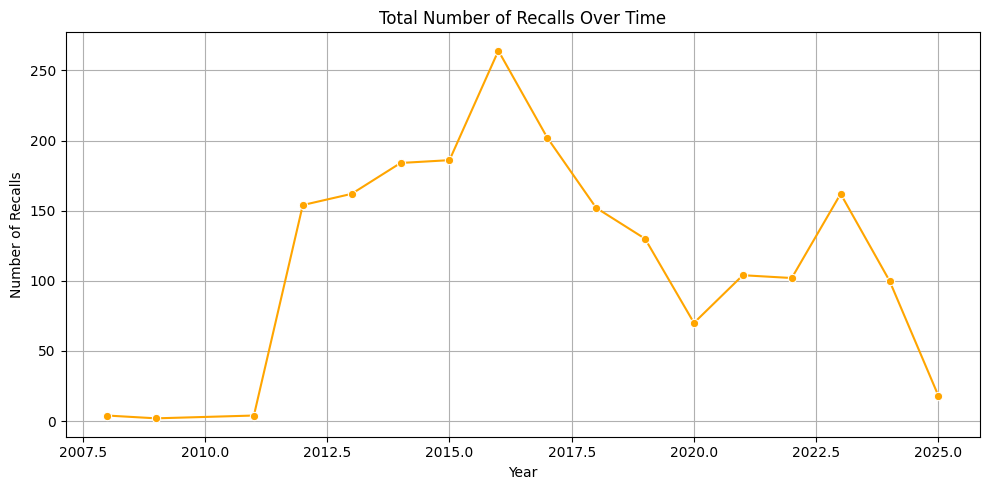

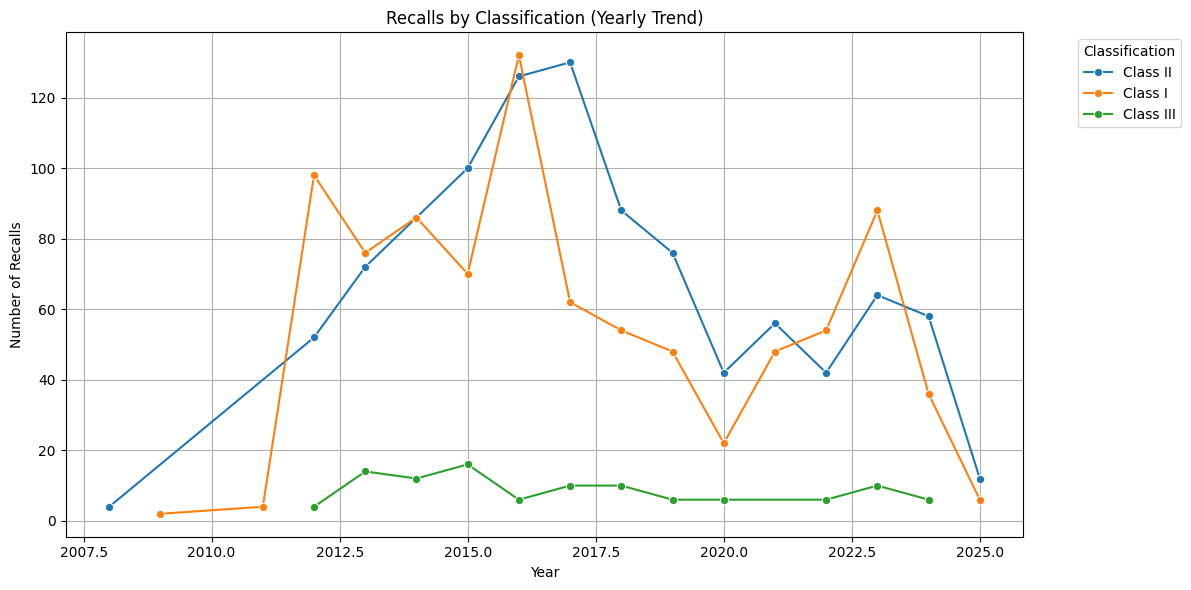

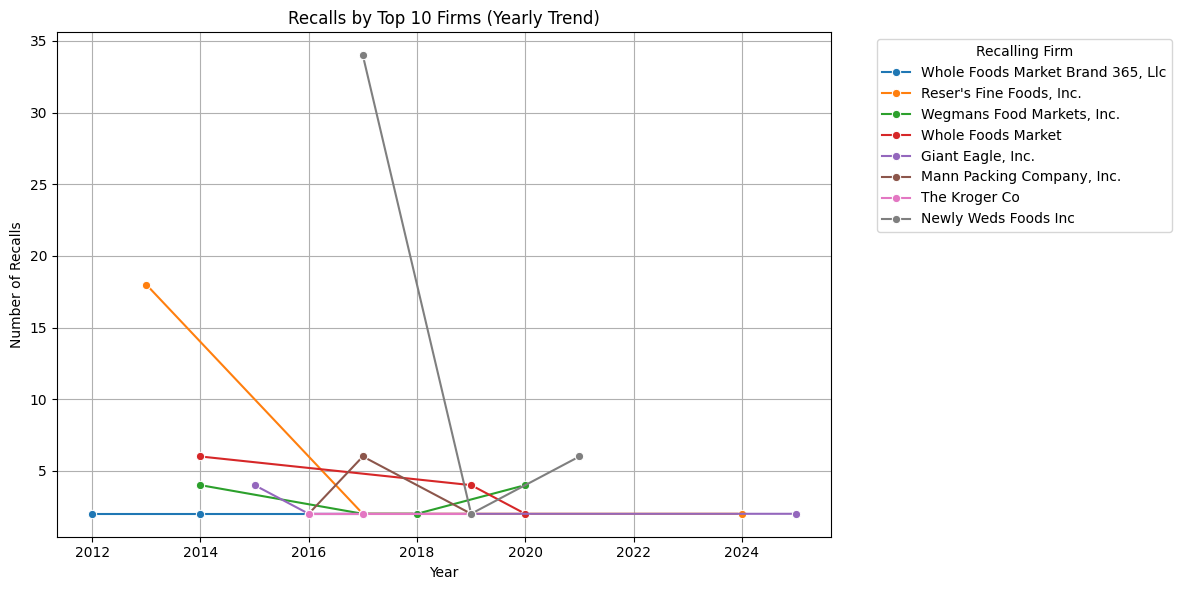

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of recalls per year
plt.figure(figsize=(10, 5))
sns.lineplot(data=recall_trend, x='year', y='recall_count', marker='o', color='orange')
plt.title('Total Number of Recalls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)
plt.tight_layout()
plt.show()

# Recalls by classification (Class I, II, III)
plt.figure(figsize=(12, 6))
sns.lineplot(data=classification_trend, x='year', y='recall_count', hue='classification', marker='o')
plt.title('Recalls by Classification (Yearly Trend)')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Recalls by top 10 recalling firms which companies had the most recalls and how that changed over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=firm_trend, x='year', y='recall_count', hue='recalling_firm', marker='o')
plt.title('Recalls by Top 10 Firms (Yearly Trend)')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Recalling Firm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q2: Predict the number of recalls using Linear Regression
We used a Linear Regression model to predict how many recalls happen each year.
First, we split the data into training and testing sets.
Then, we trained the model and tested how well it worked by checking the Mean Squared Error (MSE) and R² score.
Finally, we made a plot to compare the actual and predicted numbers of recalls.

In [ ]:
# Import libraries needed for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt

In the first model, we grouped the data by both recall classification (Class I, II, III) and year. We changed the classification into numbers using one-hot encoding, and kept the year as a feature. This allowed the model to learn from both the type of recall and when it happened.

We trained the model on part of the data and tested it on the rest.


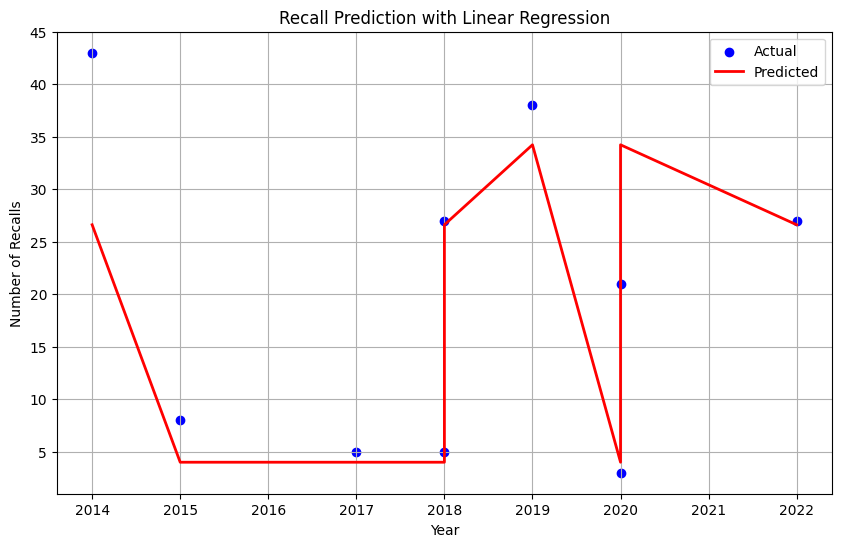

Model Coefficient: 7.615384615384606
Model Intercept: 26.615384615384624
Mean Squared Error: 53.00131492439182
R² Score: 0.7399063062598003


In [ ]:
# Model A Function (With year included)
def predict_recall_trend_A():

    # Group data by classification and year
    grouped_recalls_A = recalls_df.groupby(['classification', 'year']).size().reset_index(name='count')
    years_A = grouped_recalls_A['year'].values

    # Make dummies
    X = pd.get_dummies(grouped_recalls_A[['classification', 'year']], drop_first=True)
    X['year'] = grouped_recalls_A['year'].values
    y = grouped_recalls_A['count'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ensure the year can be plotted on the graph
    years_test_A = X_test['year'].values
    X_train = X_train.drop(columns='year')
    X_test = X_test.drop(columns='year')
    sorted_indices = years_test_A.argsort()

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(years_test_A[sorted_indices], y_test[sorted_indices], color='blue', label='Actual')
    plt.plot(years_test_A[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Predicted')
    plt.title('Recall Prediction with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Number of Recalls')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate model
    print(f"Model Coefficient: {model.coef_[0]}")
    print(f"Model Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}")

predict_recall_trend_A()


**MODEL A Results**

We measured how well it predicted using two scores:

Mean Squared Error (MSE): 53.00
R² Score: 0.74
The R² score of 0.74 means the model did a pretty good job—it was able to explain 74% of the changes in the number of recalls using the year and classification. The model also showed that the number of recalls tends to increase slightly over time.


**Model B Using Only Recall Classification**


For the second model, we only used recall classification to predict the number of recalls. We left out the year to see how much classification alone could explain.



# Q3: Analyze the distribution of recall severity classifications
We counted how many recalls belong to each classification type (Class I, II, III).  
We made a bar chart and a pie chart to show the differences and better understand the severity of the recalls.

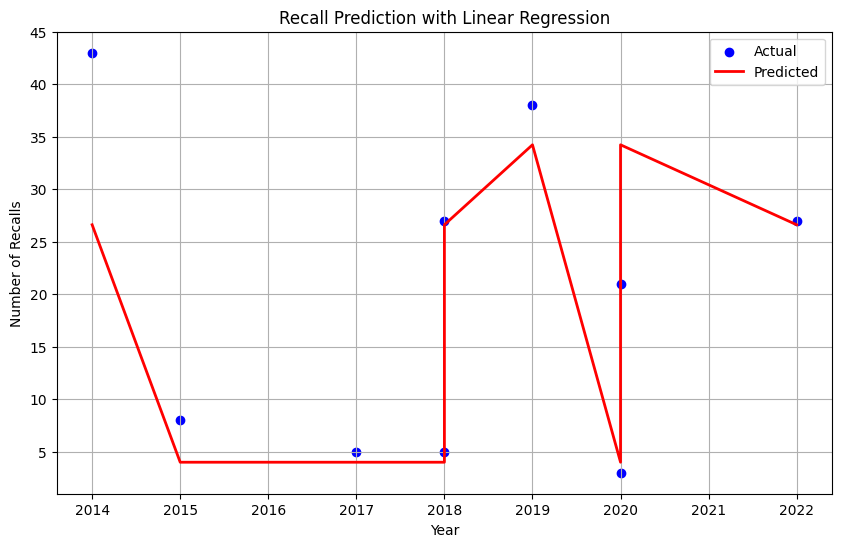

Model Coefficient: 7.615384615384606
Model Intercept: 26.615384615384624
Mean Squared Error: 53.00131492439182
R² Score: 0.7399063062598003


In [ ]:
# Model B Function (With year excluded)
def predict_recall_trend_B():

    # Group data by classification and year
    grouped_recalls_B = recalls_df.groupby(['classification', 'year']).size().reset_index(name='count')
    years_B = grouped_recalls_B['year'].values

    # Make dummies
    X = pd.get_dummies(grouped_recalls_B[['classification']], drop_first=True)
    y = grouped_recalls_B['count'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test, years_train_B, years_test_B = train_test_split(X, y, years_B, test_size=0.2, random_state=42)

    # Ensure the year can be plotted on the graph
    sorted_indices = years_test_B.argsort()

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(years_test_B[sorted_indices], y_test[sorted_indices], color='blue', label='Actual')
    plt.plot(years_test_B[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Predicted')
    plt.title('Recall Prediction with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Number of Recalls')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate model
    print(f"Model Coefficient: {model.coef_[0]}")
    print(f"Model Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}")

predict_recall_trend_B()


**Model B Results:**

Mean Squared Error (MSE): 113.98

R² Score: 0.34


This model didn’t do as well. With an R² score of 0.34, it only explained 34% of the changes. That tells us that classification by itself isn’t enough to make accurate predictions. The year clearly matters a lot.


In [ ]:
# Import libraries needed for plotting
import matplotlib.pyplot as plt

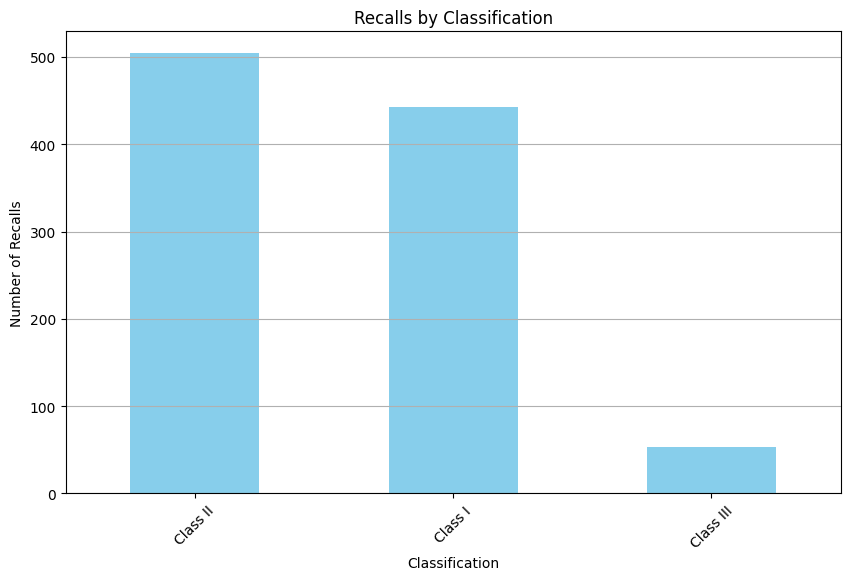

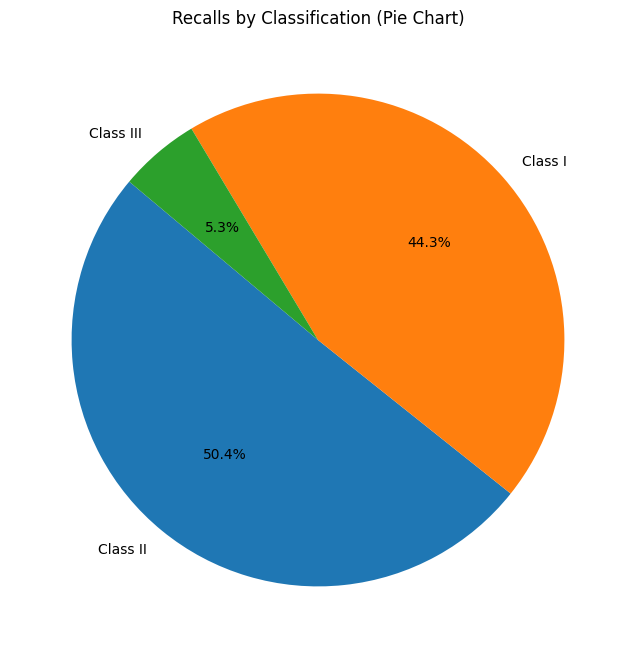

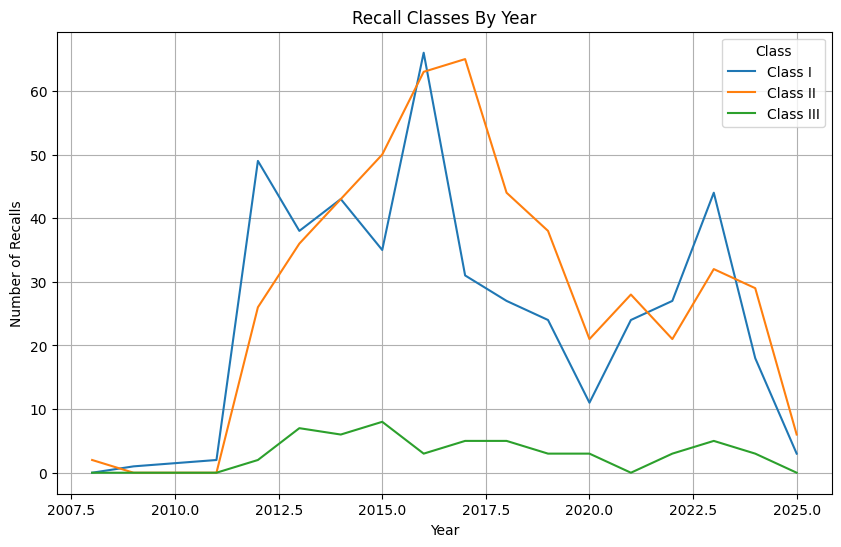

In [ ]:
def analyze_recall_classification():
    # Count number of recalls per classification
    classification_counts = recalls_df['classification'].value_counts()
    recall_counts = recalls_df.groupby(['year', 'classification']).size().unstack(fill_value=0)

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    classification_counts.plot(kind='bar', color='skyblue')
    plt.title('Recalls by Classification')
    plt.xlabel('Classification')
    plt.ylabel('Number of Recalls')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Recalls by Classification (Pie Chart)')
    plt.ylabel('')  # Remove y-axis label
    plt.show()

    # Plot line graph
    plt.figure(figsize=(10, 6))
    for recall_classification in recall_counts.columns:
      plt.plot(recall_counts.index, recall_counts[recall_classification], label=recall_classification)
    plt.title('Recall Classes By Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Recalls')
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()

# Execute the function
analyze_recall_classification()

In this project, we collected food recall data using the openFDA API and cleaned the dataset to prepare it for analysis.  
We stored the cleaned data in an SQLite database and used pandas to work with it easily.

We performed focused on three key analyses:


*   **Trend Analysis**: We examined how the number of food recalls changed over time to identify any patterns or shifts in recall frequency.
*   **Prediction**: Using a Linear Regression model, we predicted future recall numbers, helping us understand potential future trends based on historical data.
*   **Classification Distribution**: We analyzed the distribution of recalls across different severity classifications (Class I, II, III) to assess the relative risks of each classification.
Through these analyses, we developed a deeper understanding of food recall trends, the impact of various recall classes, and the potential risks for future recalls.


This analysis gave us a better picture of how serious food recalls have been historically. By looking at both total counts and year-by-year trends, we can now better understand which recalls were most common, which were most dangerous, and how things have changed over time.

